# Investigate Titanic Dataset

## 1. Introduction

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. In this project, I investigated a dataset which contains the demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.   

## 2. Data Cleaning and Exploration

### 2.1. Import all necessary tools and load the dataset

In [1]:
### Import all necessary tools
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
### Load the Titanic dataset into ipython notebook
datafile = 'data/titanic_data.csv'
Titanic = pd.read_csv(datafile) ## By default, pd.read_csv takes the first line of the csv file as the header

### 2.2. Examine the dataset and perform data cleaning 

#### 2.2.1. Examine the first 5 and last 5 examples in the dataset

In this part, I examined the first and last 5 examples in the loaded dataset. By looking at the structure of the dataset, I can decide whether there are any data wrangling tasks I should perform. 

In [3]:
### Display the first and last 5 examples in the data set
display (Titanic.head())
display (Titanic.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Comments: 
The dataset has been corrretly loaded as a Pandas dataframe. There are 891 examples and 12 attributes. I found there are some 'NaN's in the dataframe, which means there are some missing values in the dataset. Some data cleaning process should be perform to deal with these missing values.

#### 2.2.2. Counts of each attribute

In [4]:
### Count the examples for each attribute
Titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### Comments:
All of the attributes in the dataset have 891 examples except for 'Age', 'Cabin' and 'Embarked' attributes. There are 714, 204 and 889 examples for 'Age', 'Cabin' and 'Embarked'attributes, which means there are 177, 687 and 2 missing data for them respectively.

#### 2.2.3. Data type of each attribute

In this part, I investigated the data type of each attribute. Sometimes, the default data type is not suitable for further data analysis. I need to convert them to the suitable data types.

In [5]:
### Show the datatype of each attribute
Titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Comments:
The the data types of attributes 'PassengerId', 'Survived' and 'Pclass' are all int64, which is not suitable for further data analysis. I need to change them from integer type to string type.

#### 2.2.4. Change the data type of 'PassengerId', 'Survived' and 'Pclass' attributes -- Data Cleaning

In [6]:
### Change the datatype of atrributes 'PassengerId','Survived' and 'Pclass' from integer to string 
Titanic['PassengerId'] = Titanic['PassengerId'].astype('str')
Titanic['Survived'] = Titanic['Survived'].astype('str')
Titanic['Pclass'] = Titanic['Pclass'].astype('str')
Titanic.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Comments:

After this data cleaning process, now all the attributes have the suitable data types for the following data analysis.

### 2.3. Explore and analyze the Titanic dataset  

#### 2.3.1. Investigate the categorical attributes

In this part, I investigate the categorical attributes in the dataset: 'Survived', 'Pclass', 'Sex' and 'Embarked'. Some questions can be answered by exploring these categorical attributes. 

##### 2.3.1.1 In this dataset, how many people were survived from this horrible tragedy?

By exmining the 'Survived' attribute, I find, for the total of 891 people in this dataset, there were 342 people who survived and 549 people who did not survive. The survivial rate was 38.38%.

In [7]:
### Count the number of people who survived and not survived
Titanic['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived and Not Survived')

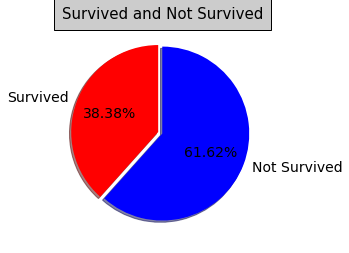

In [8]:
### Plot the pie chart to show how many people survived and how many did not survive
labels = ['Survived', 'Not Survived']
sizes = [342, 549]
colors = ['red','blue']
explode=(0.05, 0.0)

patches, texts, autotexts = plt.pie(sizes, explode = explode, labels=labels, colors = colors, autopct='%1.2f%%', shadow=True, startangle=90)
texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
autotexts[0].set_fontsize(14)
autotexts[1].set_fontsize(14)
title('Survived and Not Survived',size =15, bbox={'facecolor':'0.8', 'pad':8})

##### 2.3.1.2. How many people had the 1st, 2nd and 3rd class ticket, respectively?

By examing the 'Pclass' attribute, I find there were 216 peole holding the 1st class ticket on board, 184 people holding the 2nd class ticket and 491 people holding the 3rd class ticket. To summarize, more than half of the people (55.11%) hold the 3rd class tickets, and the percentage of people with the 1st and 2nd class tickets were 24.24% and 20.65% respectively.   

In [9]:
### Count the number of people with different class ticket 
Titanic['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Different Ticket Classes')

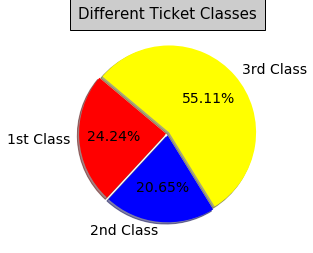

In [10]:
### Plot the pie chart to explore the people distribution with different ticket class.
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = [216, 184, 491]
colors = ['red','blue','yellow']
explode=(0.02, 0.02, 0.02)

patches, texts, autotexts = plt.pie(sizes, explode = explode, labels=labels, colors = colors, autopct='%1.2f%%', shadow=True, startangle=140)
texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
texts[2].set_fontsize(14)
autotexts[0].set_fontsize(14)
autotexts[1].set_fontsize(14)
autotexts[2].set_fontsize(14)
title('Different Ticket Classes',size =15, bbox={'facecolor':'0.8', 'pad':8})

##### 2.3.1.3. Explore the 'Sex' and 'Embarked' attributes

Using the same method as above, I find that:

1. In the total of 891 people in the dataset, there were 577 male and 314 female.

2. There were 644 people embarked from Southampton, 168 people embarked from Cherbourg, 77 people embarked from Queenstown, and 2 people associated with missing values for the 'Embarked' attribute. Since, this journey started from Southampton, it makes sense that more than 72% people embarked from Southampton. 

Data cleaning point of view: note that there are 2 missing values in the 'Embarked' attributes. Since this is a very small portion compared to the whole dataset, I just safely ignore these 2 missing values for this part of analysis.

In [11]:
### Count the number of male and female people 
Titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
### Count the number of people embarked from Southampton, Cherbourg and Queenstown respectively 
Titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 2.3.2. Investigate the numeric attributes
In this part, I investigate the numerical attributes in the Titanic dataset. 

##### 2.3.2.1. Statistics for each numeric attribute

In [13]:
### Calculate the descriptive statistics of each numeric attribute
Titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### Comments:

1. According to the statistics of 'Age' attribute, I find, for people on board, the average age was 29.70 years old, the median age was 28.00 years old and 75% of the people were under 38 years old.

2. It seems like the passengers in Titanic did not like to travel with many accompanies. More than 75% of the passengers only had at most 1 sibling,spouse, parent or child with them on board. 

3. The fare of ticket had pretty large standard deviation (49.69 pounds). The minimum ticket price was 0 pounds(free ticket), and the maximum was 512.33 pounds. The median of the ticket price was 14.45 pounds, and 75% of the total tickets were cheaper than 31 pounds. Due to the very high maximum ticket price, the average ticket price was high -- 32.2 pounds, which was even higher than the 3rd quartile of the ticket fare.


##### 2.3.2.2. For all the people in the dataset, what did the age distribution look like?

The distribution of 'Age' attribute had more or less the bell shape. 66.9% of the people in the dataset were in the age range from 15 to 55 years old. 

Text(0.5, 0, 'Age (in years)')

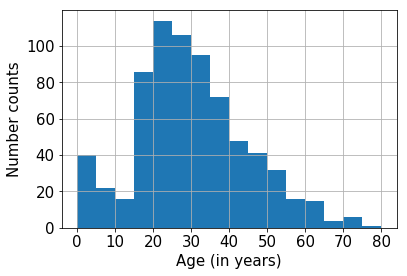

In [14]:
### Plot the distribution of Age attribute
Titanic['Age'].hist(bins=np.arange(0, max(Titanic['Age']+5), 5),xlabelsize=15,ylabelsize=15)
plt.ylabel('Number counts', size = 15)
plt.xlabel('Age (in years)', size = 15)

In [15]:
## Define a function to calculate the percentage of the number of people 
## in a attribute range with respect to the total number of people
def range_percentage(attribute, lb, ub):
    count = 0
    for i in Titanic[attribute]:
        if i >= lb and i <= ub:
            count += 1
    return count/float(len(Titanic[attribute]))

In [16]:
### Calculate the ratio of people who were 15 to 55 years old over all people
print ("The percentage of people whose age were in the rage of 15 to 55 years old was %0.4f. " % range_percentage('Age', 15, 55))

The percentage of people whose age were in the rage of 15 to 55 years old was 0.6689. 


##### 2.3.2.3. What did the ticket fare distribution look like for the dataset?

The ticket fare has a very skewed distribution. More than 94.1% people on board had the tickets which were under 100 pounds.

Text(0.5, 0, 'Pansenger Fare (in Pounds)')

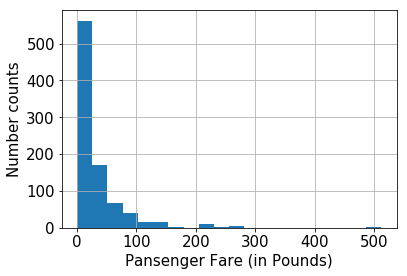

In [17]:
Titanic['Fare'].hist(bins = 20,xlabelsize=15,ylabelsize=15)
plt.ylabel('Number counts', size = 15)
plt.xlabel('Pansenger Fare (in Pounds)', size = 15)

In [18]:
print ("The percentage of tickets whose value were smaller than 100 pounds was %0.4f. " % range_percentage('Fare', 0, 100))

The percentage of tickets whose value were smaller than 100 pounds was 0.9405. 


##### 2.3.2.4. Distribution of 'Accompany' attribute

There were two attributes named 'Sibsp' and 'Parch' in the dataset. In fact, these two attributes gave the similar imformation: for a person, how many accompanies were with them on board. Therefore I combined these two attributes and name the combined attribute as 'Accompanies'. After this data cleaning process, the following analysis becomes easier.

In [19]:
## Combine the 'Sibsp' and 'Parch' attributes
Titanic['Accompanies'] = Titanic['Parch']+Titanic['SibSp']
Titanic['Accompanies'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Accompanies, dtype: int64

Text(0.5, 0, 'Number of Accompanies on Board')

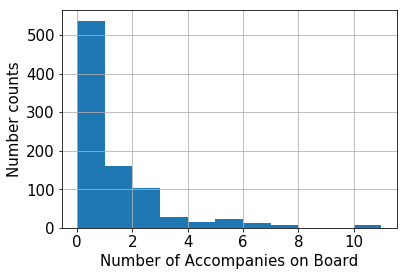

In [20]:
## Plot the distribution of 'Accompany' attribute
Titanic['Accompanies'].hist(bins =np.arange(0, max(Titanic['Accompanies'])+2, 1), xlabelsize=15, ylabelsize=15)
plt.ylabel('Number counts', size = 15)
plt.xlabel('Number of Accompanies on Board', size = 15)

In [21]:
print ("The percentage of people who had less than 3 accompanies on board was %0.4f. " % range_percentage('Accompanies', 0, 3))

The percentage of people who had less than 3 accompanies on board was 0.9304. 


#### Comments:

The 'Accompany' attribute also has a very skewed distribution. More than 93.0% people on board had less than 3 accompanies with them.

#### 2.3.3.  Why there were some people could have free tickets on board?

To answer this question, I simply print out the information of all the people with free tickets. 

In [22]:
display (Titanic [Titanic['Fare']==0])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Accompanies
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0


#### Comments:

There were 15 people on board with free tickets, and they all embarked from Southampton. Since this trip started from Southampton, it is highly possible that these 15 people were crews of Titanic. All of these 15 people were male, and had no parents, children, siblings and spouses with them on board. These characteristics give me more confidence to tentatively conclude that these 15 people were crews on Titanic. 

Another possible reason, I guess, that there was some kind of lottery in Southampton for free tickets to Titanic, and these 15 'lucky' people won the lottery and got free tickets on board.

#### 2.3.4.  Who purchased the most expensive ticket?

In [23]:
display (Titanic [Titanic['Fare']== max(Titanic['Fare'])])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Accompanies
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0


#### Comments:

There were 3 people who shared the most expensive ticket, since they had the same ticket number. So the most expensive ticket was a group ticket.



#### 2.3.5.  Are there any other group ticketes?

  

In [24]:
## Print the number of unique ticket
print (len(Titanic['Ticket'].value_counts()))
## Count the number of ticket which had only one owner
count =0
for i in Titanic['Ticket'].value_counts():
    if i == 1:
        count +=1
print (count)


681
547


Answer:
There are only 681 unique tickets in the dataset, and there were 547 tickets that had one owners. This means there were 134 group tickets which were shared by 344 people. 

#### 2.3.6.  On average, how much was the most expensive ticket for one person?

Since there were some group tickets, and in the original dataset, the people who had group tickets were counted as that they paid the total money. Therefore, in the 'Fare' column, some ticket fares were multiple counted. It is a good idea to split the group ticket fare by the number of people who shared it. I made a new attribute called "Fare_each" which gives the effective ticket fare paid by each person. For the group ticket, I divided its total fare by the number of people who shared it, and the averaged ticket fare was assigned to these people.

In [26]:
## Make the 'Fare_each' column
Ticket_counts = Titanic['Ticket'].value_counts()
Ticket_counts_dict = Ticket_counts.to_dict()
Titanic['Fare_each'] = Titanic['Fare']

for i in range(len(Titanic)):
    if Titanic.loc[i,'Ticket'] in Ticket_counts_dict:
        Titanic.loc[i,'Fare_each'] = Titanic.loc[i,'Fare_each']/int(Ticket_counts_dict[Titanic.loc[i,'Ticket']])            
            

In [27]:
Titanic[Titanic['Fare']==max(Titanic['Fare'])] ## test the result.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Accompanies,Fare_each
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0,170.7764
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,170.7764
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,170.7764


In [28]:
Titanic['Fare_each'].max()

221.7792

Text(0.5, 0, 'Pansenger Fare per Person (in Pounds)')

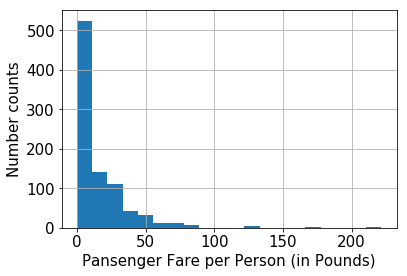

In [29]:
Titanic['Fare_each'].hist(bins = 20,xlabelsize=15,ylabelsize=15)
plt.ylabel('Number counts', size = 15)
plt.xlabel('Pansenger Fare per Person (in Pounds)', size = 15)

#### Comments: 

The most expensive ticket for each person was 221.8 pounds. The distribution of 'Fare_each' attribute was still very skewed. 

### 2.4. Study the attributes which could influence the survivial rate on board

From this Titanic dataset, the insight that I really want to get is what factors influenced the survivial rate on board. To answer this question, I study the relationship between 'Sruvived' and some other attributes. 

#### 2.4.1. Are women more likely to survive?



In [31]:
Titanic.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [34]:
%%html  
<style>
table {float:left}
</style>

Relation talbe for 'Survived' and 'Sex' attributes:

| | Male | Female         
| :--: |:-: | :-:
|Total| 577  | 314
| Survived | 109 | 233
| Not Survived | 468 | 81
|Survival Rate|18.89%|74.20%

#### Comments: 
There were 577 male on board, and only 109 male were survived. The survivial rate for male was 18.89%. However, there were 314 female on board, and 233 were survived. The survivial rate for female was 74.20%. From this dataset, tentatively speaking, women had more chance to survive.

#### 2.4.2. Does the passenge class influence survivial rate?

In [35]:
Titanic.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

| | 1st Class | 2nd Class | 3rd Class         
| :--: |:-:| :-: | :-:
|Total| 216  | 184 | 491
| Survived | 136 | 87 | 119
| Not Survived | 80 | 97 | 372
|Survival Rate|62.96%|47.28%|24.24%

#### Comments: 

From the table above, we can see that the 1st Class had the highest survival rate, and the 3rd class had the lowest survivial rate. This data tentatively shows that the people with higer level class of tickets had higher chance to survive. 

#### 2.4.3. Were older peple more likely to survive?

To answer this question, I investigate the relation between 'Survived' and 'Age' attributes in a statistical way. 

Data Cleaning: 
Noted that there are 177 missing values for the 'Age' attribute. I just deleted these examples for this part of analysis. 

I have another two alternative methods to deal with these missing values: 1.Using averaged age to replace the missing values; 2. Using some regression technique to estimate the missing values. Since these two methods could potentially bring some bias into the following analysis, I prefer not to use them. Also, since there are still 714 examples left for this analysis, I am confident with the results. 

Text(0, 0.5, 'Age (in years)')

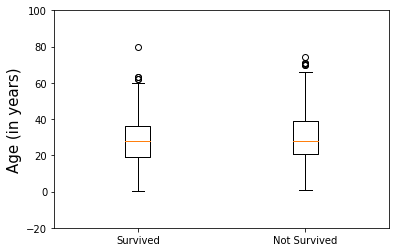

In [36]:
Titanic_Survived_Age = Titanic [['Survived', 'Age']]
Titanic_Survived_Age_NoMissingValues = Titanic_Survived_Age.dropna() ## delete the examples with missing values

Age_Survived_yes = Titanic_Survived_Age_NoMissingValues['Age'][Titanic_Survived_Age_NoMissingValues['Survived']=='1'].values
Age_Survived_no = Titanic_Survived_Age_NoMissingValues['Age'][Titanic_Survived_Age_NoMissingValues['Survived']=='0'].values

Survived_Age = [Age_Survived_yes,Age_Survived_no] 

plt.boxplot(Survived_Age)
axes = plt.gca()
axes.set_ylim([-20,100])
plt.xticks([1, 2], ['Survived', 'Not Survived'])
plt.xlabel('', size = 15)
plt.ylabel('Age (in years)',size = 15)

From the box plot above, we can not observed significant age difference between survived people and not survived people. To further examine this result, I perform a hypothesis test on the age of survived and not survived people.

#### Perform a hypothesis test

Null: The survived and not survived people had the same age;

Alternative: The survived and not survived people had different same age.

In [37]:
stats.ttest_ind(Age_Survived_yes, Age_Survived_no)

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

#### Comments:
I performed a two-direction t-test on the age of survived and not survived people. Since the p value is smaller than 5%, we can say the ages of survived and non-survived people were significantly different with a risk level of 5%. Since the t statistic here is negative, I can tenatively say that the youger people have more chance to survive.

#### 2.4.4. Investigate the relation between 'Survived' and 'Fare_each' attributes

Text(0, 0.5, 'Fare (in pounds)')

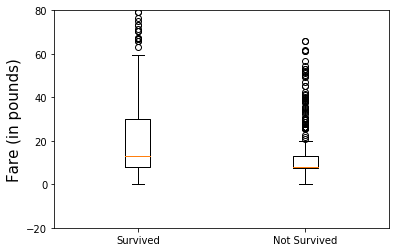

In [38]:
Fare_Survived_yes = Titanic['Fare_each'][Titanic['Survived']=='1'].values
Fare_Survived_no = Titanic['Fare_each'][Titanic['Survived']=='0'].values

Survived_Fare = [Fare_Survived_yes,Fare_Survived_no]

plt.boxplot(Survived_Fare)
axes = plt.gca()
axes.set_ylim([-20,80])
plt.xticks([1, 2], ['Survived', 'Not Survived'])
plt.xlabel('', size = 15)
plt.ylabel('Fare (in pounds)',size = 15)

In [39]:
stats.ttest_ind(Fare_Survived_yes, Fare_Survived_no)

Ttest_indResult(statistic=7.857249954413839, pvalue=1.1310548734054081e-14)

#### Comments: 

From the box plot, we can see, in general, the people with more expensive tickets had higher chance to survive. 

For the two-direction t-test, since the p value is very small, we can say the ticket fare of survived and non-survived people were very significantly different. Since the t-statistics is positive, we can say the survivied people held the more expensive ticket.

### 2.5 Investigate the relationships between other attributes

In this part, I investigate the relationships between other interested attributes.

#### 2.5.1 Investigate the relationship between 'Pclass' and 'Fare'

In [40]:
Titanic.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


#### Comments:

From the descriptive statistics of 'Fare' under different 'Pclass' condition, we can infer that the higher level class has higher ticket price. 

Text(0, 0.5, 'Fare (in Pounds)')

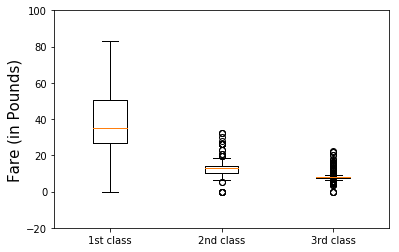

In [41]:
Fare_Pclass_1st = Titanic['Fare_each'][Titanic['Pclass']=='1'].values
Fare_Pclass_2nd = Titanic['Fare_each'][Titanic['Pclass']=='2'].values
Fare_Pclass_3rd = Titanic['Fare_each'][Titanic['Pclass']=='3'].values

Fare_Pclass = [Fare_Pclass_1st,Fare_Pclass_2nd,Fare_Pclass_3rd]

plt.boxplot(Fare_Pclass)
axes = plt.gca()
axes.set_ylim([-20,100])
plt.xticks([1,2,3], ['1st class', '2nd class', '3rd class'])
plt.xlabel('', size = 15)
plt.ylabel('Fare (in Pounds)',size = 15)

#### Comments:

As shown clearly from the box plot that the higher class level tend to have the higher ticket fare, which is not surprising. 

For the 1st class ticket, the minimum fare is 0. For the 2nd and 3rd class, there were no 0 fare tickets. This means the people who had the 0 fare tickets (probably they were crews) all stayed in the 1st class. 

#### 2.5.2. Investigate the relationship between 'Pclass' and 'Age'

Text(0, 0.5, 'Age (in years)')

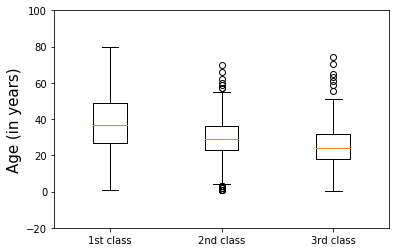

In [42]:
Titanic_Pclass_Age = Titanic [['Pclass', 'Age']]
Titanic_Pclass_Age_NoMissingValues = Titanic_Pclass_Age.dropna()

Age_Pclass_1st = Titanic_Pclass_Age_NoMissingValues['Age'][Titanic_Pclass_Age_NoMissingValues['Pclass']=='1'].values
Age_Pclass_2nd = Titanic_Pclass_Age_NoMissingValues['Age'][Titanic_Pclass_Age_NoMissingValues['Pclass']=='2'].values
Age_Pclass_3rd = Titanic_Pclass_Age_NoMissingValues['Age'][Titanic_Pclass_Age_NoMissingValues['Pclass']=='3'].values

Age_Pclass = [Age_Pclass_1st,Age_Pclass_2nd,Age_Pclass_3rd]

plt.boxplot(Age_Pclass)
axes = plt.gca()
axes.set_ylim([-20,100])
plt.xticks([1,2, 3], ['1st class', '2nd class', '3rd class'])
plt.xlabel('', size = 15)
plt.ylabel('Age (in years)',size = 15)


#### Comments:

From the box-plot, we can see the older people tend to stay in the higher level class. Since the older people are more likely to be rich, it is reasonable for them to stay in the higer level class.

## 3. Conclusions
In this project, I performed a thorough exploration on the Titanic dataset, and I summarize my foundings here.

### 3.1. Summary of Data Cleaning 
a. There are 891 examples and 12 different attributes in the dataset. There are 177, 687 and 2 missing values in 'Age', 'Cabin' and 'Embarked' attributes. When analyzing the relationship between survival rate and age, I just delete the examples with missing values in "Age". 

b. The data types of attributes 'PassengerId', 'Survived' and 'Pclass' are all int64, which are not suitable for further data analysis. I change them from integer type to string type.

### 3.2  Summary of Attribute Exploration
a. The distribution of 'Age' attribute had more or less the bell shape. 66.9% of the people in the dataset were in the age range from 15 to 55 years old.

b. It seems like the passengers in Titanic did not like to travel with many accompanies. More than 75% of the passengers only had at most 1 sibling, spouse, parent or child with them on board. The percentage of people who had less than 3 accompanies on board was 93%.

c. The fare of ticket had pretty large standard deviation (49.69 pounds). Due to the very high maximum ticket price, the average ticket price was high -- 32.2 pounds, which was even higher than the 3rd quartile of the ticket fare. The percentage of tickets whose value were smaller than 100 pounds was 94%.

### 3.3 Summary of Relation Patterns

a. The survivial rate for male was 18.89%, while the survivial rate for female was 74.20%. From this dataset, tentatively speaking, women had more chance to survive.

b. People in 1st Class had the highest survival rate, and people in the 3rd class had the lowest survivial rate. This data tentatively shows that the people with higer level class of tickets had higher chance to survive.

c. I performed a two-direction t-test on the ages of survived and not survived people. Since the p value is smaller than 5%, I can infer that the ages of survived and non-survived people were significantly different with a risk level of 5%. Since the t statistic here is negative, I can tenatively say that the youger people have more chance to survive.

d. I also performed a two-direction t-test on the ticket fares of survived and not survived people. Since the p value I got is very small, we can infer that the ticket fare of survived and non-survived people were very significantly different. Since the t-statistics is positive, we can say the survivied people were more likely to have more expensive tickets.

### 3.4 Further Research Directions

After the data analysis, I infer that the "Sex", "Pclass", "Age" and "Fare" attributes have relations with the survival rate. I can build a machine learning model, like random forest, using these features to make predictions on the survival rate. This machine learning model would be very interesting. Moreover, I can investigate other data cleaning techniques about dealing with missing values, and compare the effects of those techniques wiht my current analysis. 